# Explore here

In [6]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.decomposition import PCA
from imblearn.metrics import specificity_score

In [7]:
# Leer csv
df = pd.read_csv('/workspaces/pille9-logistic-regression/data/raw/bank-marketing-campaign-data.csv', sep=';')
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [8]:
df.shape

(41188, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Analizar constantes
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [11]:
# Revisar duplicados
df.duplicated().sum()

np.int64(12)

In [12]:
df = df.drop_duplicates().reset_index(drop = True)

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.00,NaN,NaN,NaN,40.02,10.42,17.00,32.00,38.00,47.00,98.00
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41176,2,cellular,26135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [15]:
categorical_vars = df.select_dtypes(include=["object"]).columns
for var in categorical_vars:
    print(f"Variable: '{var}': {df[var].unique()}")

Variable: 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Variable: 'marital': ['married' 'single' 'divorced' 'unknown']
Variable: 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Variable: 'default': ['no' 'unknown' 'yes']
Variable: 'housing': ['no' 'yes' 'unknown']
Variable: 'loan': ['no' 'yes' 'unknown']
Variable: 'contact': ['telephone' 'cellular']
Variable: 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Variable: 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
Variable: 'poutcome': ['nonexistent' 'failure' 'success']
Variable: 'y': ['no' 'yes']


In [16]:
# Asignar números a variables categóricas
df["job_n"] = pd.factorize(df["job"], sort=True)[0]
df["marital_n"] = pd.factorize(df["marital"], sort=True)[0]
df["education_n"] = pd.factorize(df["education"], sort=True)[0]
df["contact_n"] = pd.factorize(df["contact"], sort=True)[0]
df["day_n"] = pd.factorize(df["day_of_week"])[0] + 1
df["y_n"] = pd.factorize(df["y"], sort=True)[0]

ynunk_mapeo = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df["default_n"] = df['default'].map(ynunk_mapeo)
df["housing_n"] = df['housing'].map(ynunk_mapeo)
df["loan_n"] = df['loan'].map(ynunk_mapeo)

meses_mapeo = {
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'oct': 10,
    'nov': 11,
    'dec': 12,
    'mar': 3,
    'apr': 4,
    'sep': 9
}
df["month_n"] = df["month"].map(meses_mapeo)

outcome_mapeo = {
    'failure': 0,
    'success': 1,
    'nonexistent': 2
}
df["poutcome_n"] = df['poutcome'].map(outcome_mapeo)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_n,marital_n,education_n,contact_n,day_n,y_n,default_n,housing_n,loan_n,month_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,3,1,0,1,1,0,0,0,0,5,2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,7,1,3,1,1,0,2,0,0,5,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,7,1,3,1,1,0,0,1,0,5,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0,1,1,1,1,0,0,0,0,5,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,7,1,3,1,1,0,0,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes,5,1,5,0,5,1,0,1,0,11,2
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no,1,1,5,0,5,0,0,0,0,11,2
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no,5,1,6,0,5,0,0,1,0,11,2
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes,9,1,5,0,5,1,0,0,0,11,2


In [17]:
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

In [18]:
df_clean = df.drop(categorical_vars, axis=1)
df_clean

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,contact_n,day_n,y_n,default_n,housing_n,loan_n,month_n,poutcome_n
0,56,261,1,999,0,1.10,93.99,-36.40,4.86,5191.00,3,1,0,1,1,0,0,0,0,5,2
1,57,149,1,999,0,1.10,93.99,-36.40,4.86,5191.00,7,1,3,1,1,0,2,0,0,5,2
2,37,226,1,999,0,1.10,93.99,-36.40,4.86,5191.00,7,1,3,1,1,0,0,1,0,5,2
3,40,151,1,999,0,1.10,93.99,-36.40,4.86,5191.00,0,1,1,1,1,0,0,0,0,5,2
4,56,307,1,999,0,1.10,93.99,-36.40,4.86,5191.00,7,1,3,1,1,0,0,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.10,94.77,-50.80,1.03,4963.60,5,1,5,0,5,1,0,1,0,11,2
41172,46,383,1,999,0,-1.10,94.77,-50.80,1.03,4963.60,1,1,5,0,5,0,0,0,0,11,2
41173,56,189,2,999,0,-1.10,94.77,-50.80,1.03,4963.60,5,1,6,0,5,0,0,1,0,11,2
41174,44,442,1,999,0,-1.10,94.77,-50.80,1.03,4963.60,9,1,5,0,5,1,0,0,0,11,2


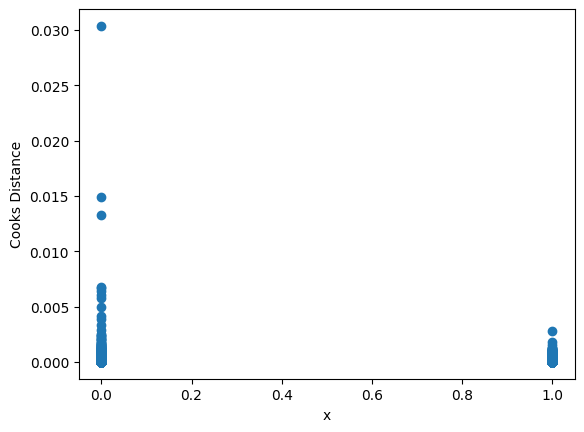

In [19]:
# Separar variable dependiente de independientes
X = df_clean.drop(['y_n'], axis = 1)
y = df['y_n']

# Ajustar modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

# Distancia de cook
cooks_distance = model.get_influence().cooks_distance

plt.scatter(df_clean.y_n, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df_clean)

# Anuncios por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

# Eliminar observaciones que se consideran influentes
df_clean2 = df_clean.drop(np.where(cooks_distance[0] > pto_corte)[0])

In [21]:
# Separamos las variables independientes de la dependiente
X = df_clean2.drop(['y_n'], axis=1)
y = df_clean2['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
3,pdays,62.54
9,nr.employed,22.63
5,emp.var.rate,3.69
1,duration,3.45
15,default_n,1.51
8,euribor3m,1.19
4,previous,0.99
17,loan_n,0.64
11,marital_n,0.61
7,cons.conf.idx,0.48


In [23]:
# Seleccionamos las características que presentan más de un 0,98% de importancia
X_train = X_train[df_imp[df_imp.Importance>0.98]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>0.98]['Feature'].values]

<Axes: >

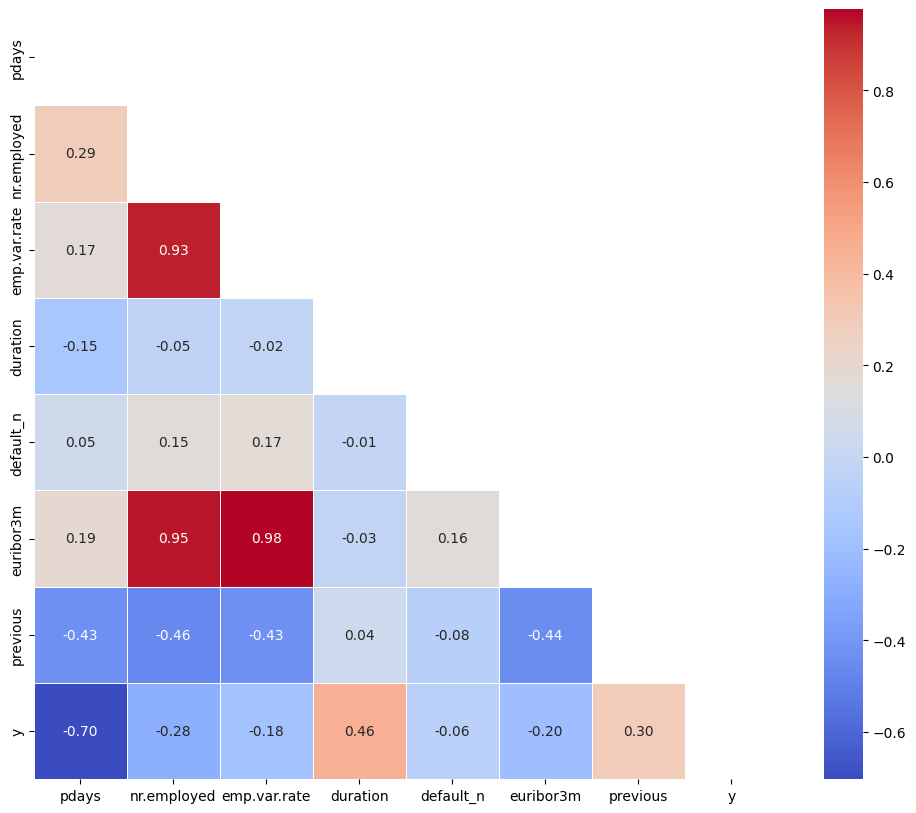

In [24]:
## VIF
X_train.corr()

vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [25]:
# PCA para combinar emp.var.rate, nr.employed y euribor3m en uno debido a que presentan gran correlación entre ellas

# Variables a combinar
employ_var_euribor = ["nr.employed", "emp.var.rate", "euribor3m"]

# Ajustar PCA
pca = PCA(n_components=1).fit(X_train[employ_var_euribor])

# Transformar train y test usando el PCA ajustado
X_train["economic_index"] = pca.transform(X_train[employ_var_euribor])
X_test["economic_index"] = pca.transform(X_test[employ_var_euribor])

# Opcional: Eliminar las columnas originales si ya no las necesitas
X_train.drop(columns=employ_var_euribor, inplace=True)
X_test.drop(columns=employ_var_euribor, inplace=True)

In [26]:
print(f"Varianza explicada por el componente principal: {pca.explained_variance_ratio_[0]:.2f}")
X_train

Varianza explicada por el componente principal: 1.00


,pdays,duration,default_n,previous,economic_index
16599,999,259,0,0,50.18
15188,999,104,0,0,50.18
19120,999,112,0,0,50.18
17181,999,177,2,0,50.18
179,999,270,0,0,13.09
...,...,...,...,...,...
17667,999,206,0,0,50.18
6470,999,112,0,0,13.09
11732,999,11,2,0,50.18
880,999,260,0,0,13.09


In [27]:
# Instancio la clase del escalador y lo ajusto con los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train)

# Trasnformamos los datos numericos con el escalador ajustado
X_train_sc = pd.DataFrame(scaler.transform(X_train))
X_test_sc = pd.DataFrame(scaler.transform(X_test))




In [28]:
X_train_sc["y"] = y_train.values
X_test_sc["y"] = y_test.values
X_train_sc.to_csv("../data/processed/train_data.csv", index = False)
X_test_sc.to_csv("../data/processed/test_data.csv", index = False)

In [29]:
X_train = X_train_sc.drop(["y"], axis = 1)
y_train = X_train_sc["y"]
X_test = X_test_sc.drop(["y"], axis = 1)
y_test = X_test_sc["y"]

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], shape=(7206,))

In [31]:
y_pred_train = model.predict(X_train)

In [32]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [33]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.00,0.90,0.91,1.00,0.82,1.00
Test,1.00,0.93,0.94,0.99,0.88,1.00
Diferencia,-0.00,-0.03,-0.03,0.01,-0.06,0.00


In [34]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [35]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [36]:
model = LogisticRegression(C = 1, penalty = "l1", solver = "saga")
model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [37]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], shape=(7206,))

In [38]:
y_pred_train = model.predict(X_train)

In [39]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.00,0.94,0.96,0.97,0.91,1.00
Test,1.00,0.96,0.97,0.97,0.94,1.00
Diferencia,-0.00,-0.02,-0.02,-0.01,-0.03,-0.00


In [41]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-1_penalty-l1_solver-saga_42.sav", "wb"))